<a href="https://colab.research.google.com/github/DaffaHamsy/SVM-SisCer/blob/main/SVM_SistemCerdas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Akurasi model: 100.00%


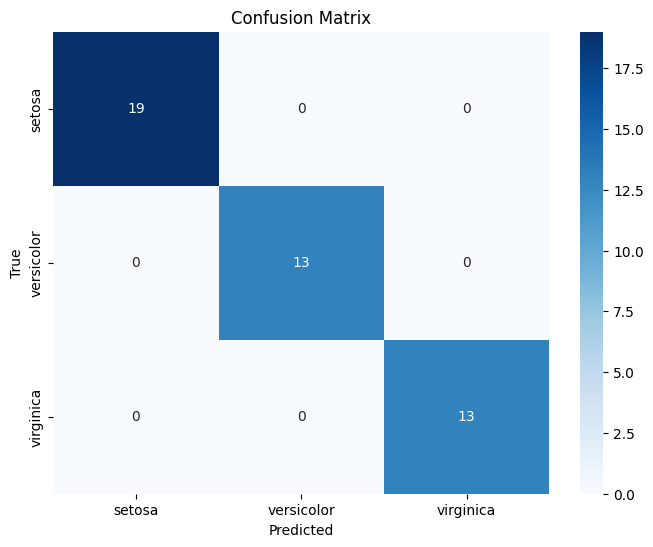

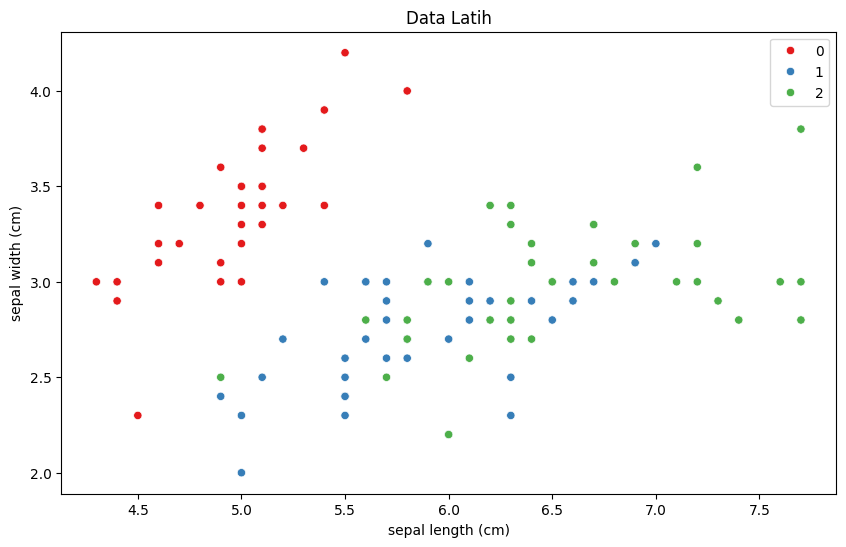

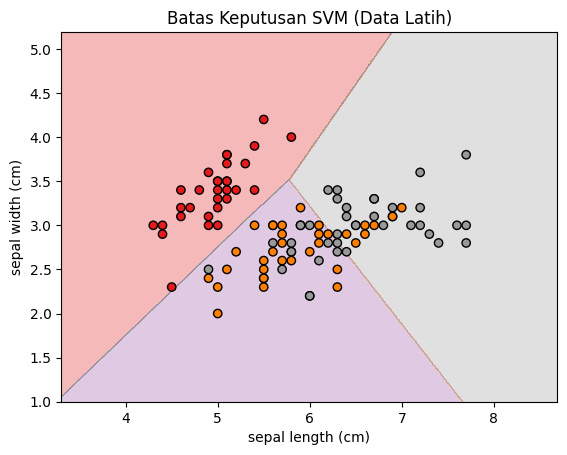

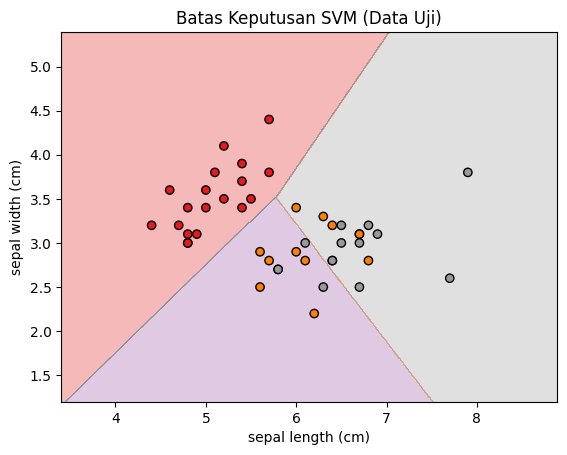

In [1]:
# Langkah 1: Import library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Langkah 2: Memuat dataset iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Langkah 3: Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Langkah 4: Melatih model SVM menggunakan data latih
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Langkah 5: Menguji akurasi model menggunakan data uji
y_pred = svm_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Akurasi model: {accuracy * 100:.2f}%")

# Langkah 6: Membuat confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Langkah 7: Visualisasi data latih
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train, palette='Set1')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Data Latih')
plt.show()

# Langkah 8: Visualisasi batas keputusan SVM
def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='Set1')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='Set1')
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.title(title)
    plt.show()

# Karena visualisasi batas keputusan hanya untuk 2 fitur, kita pilih 2 fitur pertama dari dataset
svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train[:, :2], y_train)
plot_decision_boundaries(X_train[:, :2], y_train, svm_model_2d, 'Batas Keputusan SVM (Data Latih)')
plot_decision_boundaries(X_test[:, :2], y_test, svm_model_2d, 'Batas Keputusan SVM (Data Uji)')
